<a href="https://colab.research.google.com/github/aks32003/BigMart_SalesPrediction/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement: You are provided with a dataset containing Big Mart sales data containing columns like Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type,Item_MRP,Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size,Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales. Use these to predict Item_Outlet_Sales.

Notebook by- AKASH SINGH

Import all dependancies


In [31]:
# data analysis and wrangling
import pandas as pd
import numpy as np
# visualization
import matplotlib.pyplot as plt
import seaborn as sns
# machine learning
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

Importing Data from CSV File

In [32]:
#Importing data
df=pd.read_csv('/content/Train.csv')

In [33]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [34]:
df.shape

(8523, 12)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [36]:
# Seperating Data into numerical and categorical values
data_types = df.dtypes
categorical_columns = data_types[data_types == 'object'].index
numerical_columns = data_types[data_types != 'object'].index
print(categorical_columns)
print(numerical_columns)

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')
Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')


Categorical Columns-
- Item_Identifier
- Item_Fat_Content
- Item_Type
- Outlet_Identifier
- Outlet_Size
- Outlet_Location_Type
- Outlet_Type

Numerical Columns-
- Item_Weight
- Item_Visibility
- Item_MRP
- Outlet_Establishment_Year
- Item_Outlet_Sales

In [37]:
# Checking for missing values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Handling Null Values
- For Numerical Null values we use Mean to fill in the missing values
- For Categorical Null values we use Mode to fill in the missing values

Handling Numerical Missing Values

In [38]:
#Filling missing numerical values with mean of the column
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace= True)

Handling Categorical Missing Values

In [39]:
mode_outlet= df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [40]:
mode_outlet

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [41]:
missing_values=df['Outlet_Size'].isnull()

In [42]:
#Filling missing categorical values with mode of the column
df.loc[missing_values,'Outlet_Size'] = df.loc[missing_values,'Outlet_Type'].apply(lambda x: mode_outlet[x])

Data Analysis

In [43]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [44]:
sns.set()

Numerical Column Visualization

<ipython-input-45-ca604ab42994>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Weight'])


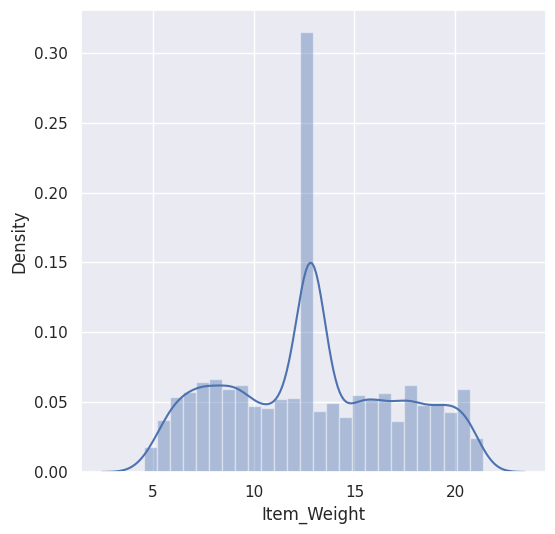

In [45]:
# Item_Weight distribution plot
plt.figure(figsize=(6,6))
sns.distplot(df['Item_Weight'])
plt.show()

Normal Distribution observed

<ipython-input-46-75a333a67bdc>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Visibility'])


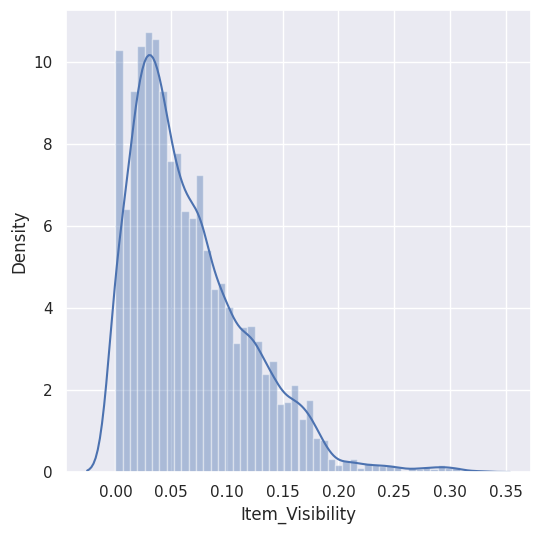

In [46]:
# Item_Visibility distribution plot
plt.figure(figsize=(6,6))
sns.distplot(df['Item_Visibility'])
plt.show()

Skewness can be seen in Item Visibility

<ipython-input-47-213cf19ac4ac>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_MRP'])


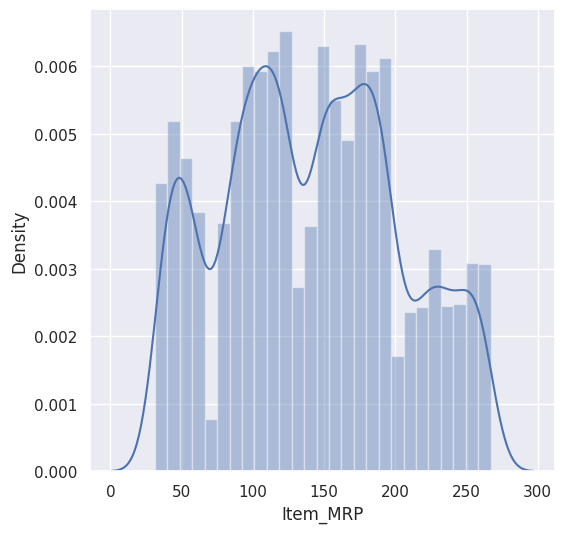

In [47]:
# Item_MRP distribution plot
plt.figure(figsize=(6,6))
sns.distplot(df['Item_MRP'])
plt.show()

<ipython-input-48-57aa0d8bc634>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Outlet_Sales'])


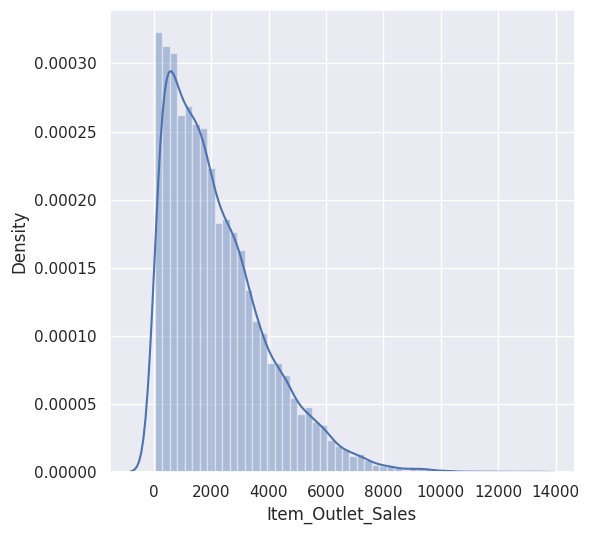

In [48]:
# Item_Outlet_Sales distribution plot
plt.figure(figsize=(6,6))
sns.distplot(df['Item_Outlet_Sales'])
plt.show()

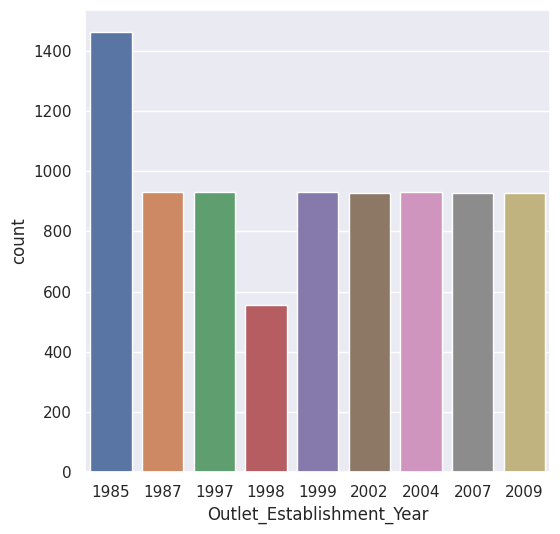

In [49]:
# Outlet_Establishment_Year Count plot
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=df)
plt.show()

Categorical Column Visualization

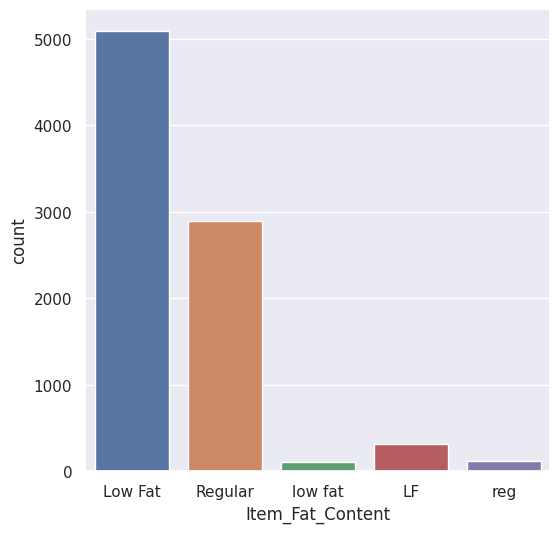

In [50]:
# Item_Fat_Content Count plot
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=df)
plt.show()

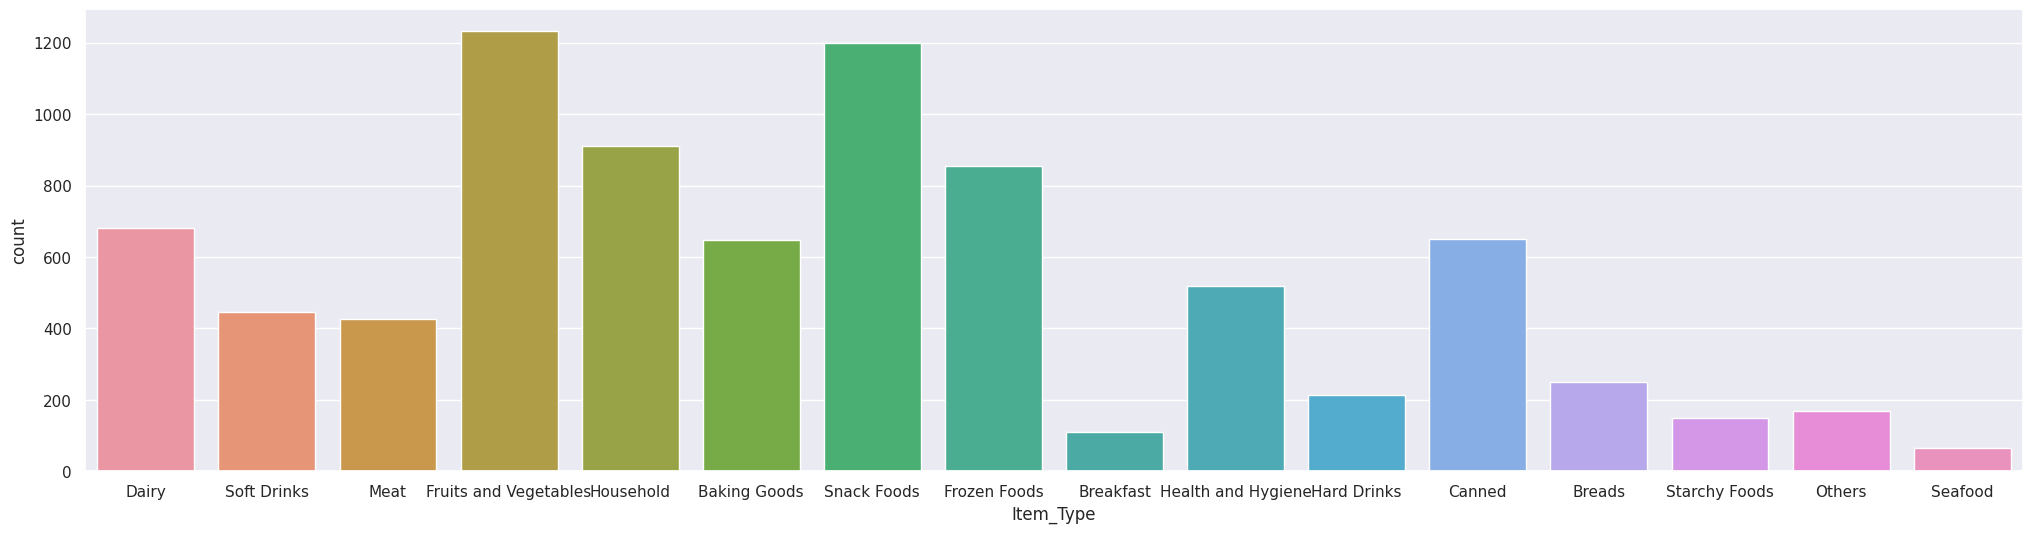

In [51]:
#Item_Type Count plot
plt.figure(figsize=(25,6))
sns.countplot(x='Item_Type', data=df)
plt.show()

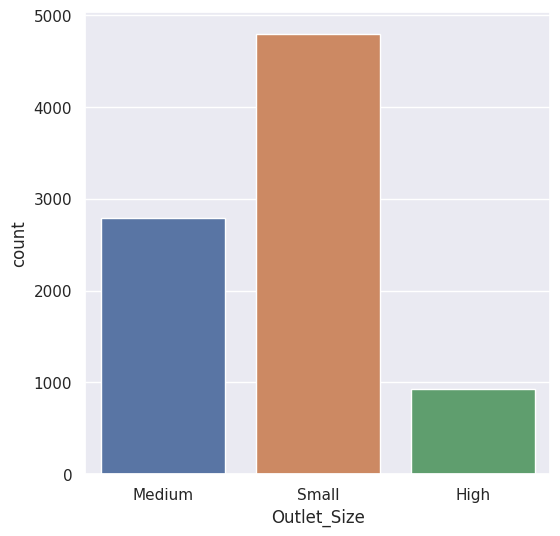

In [52]:
#Outlet_Size Count plot
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=df)
plt.show()

<ipython-input-53-7ae66f90376a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


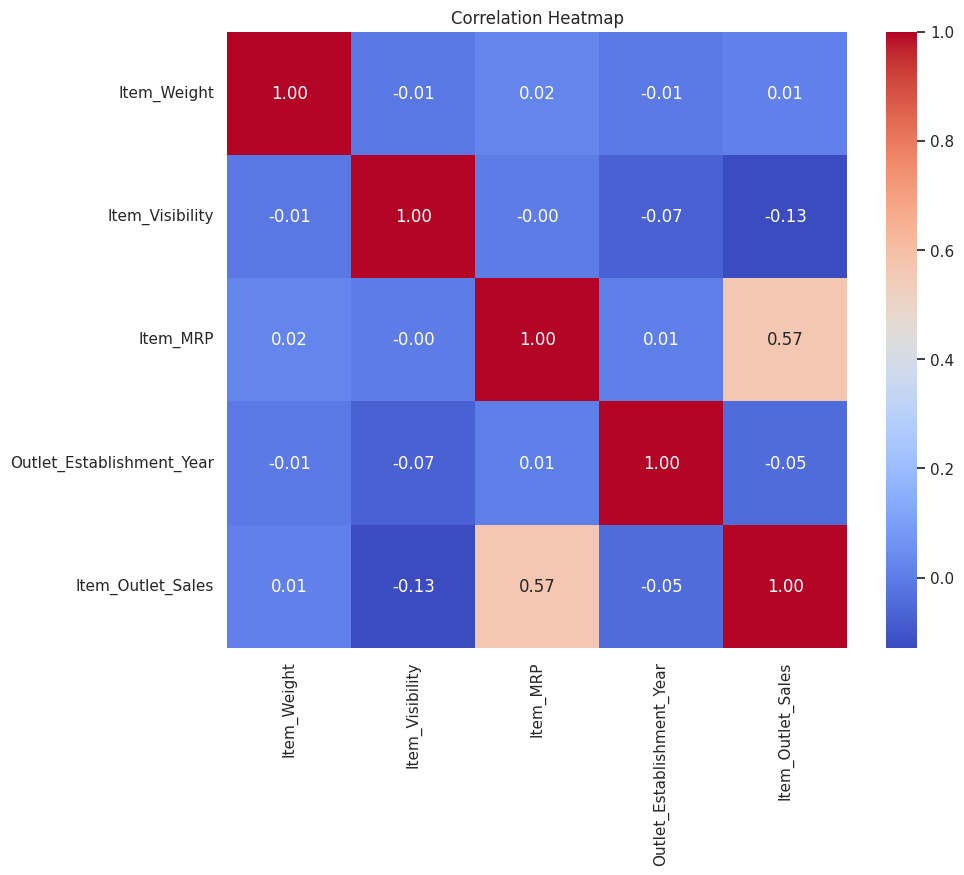

In [53]:
# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

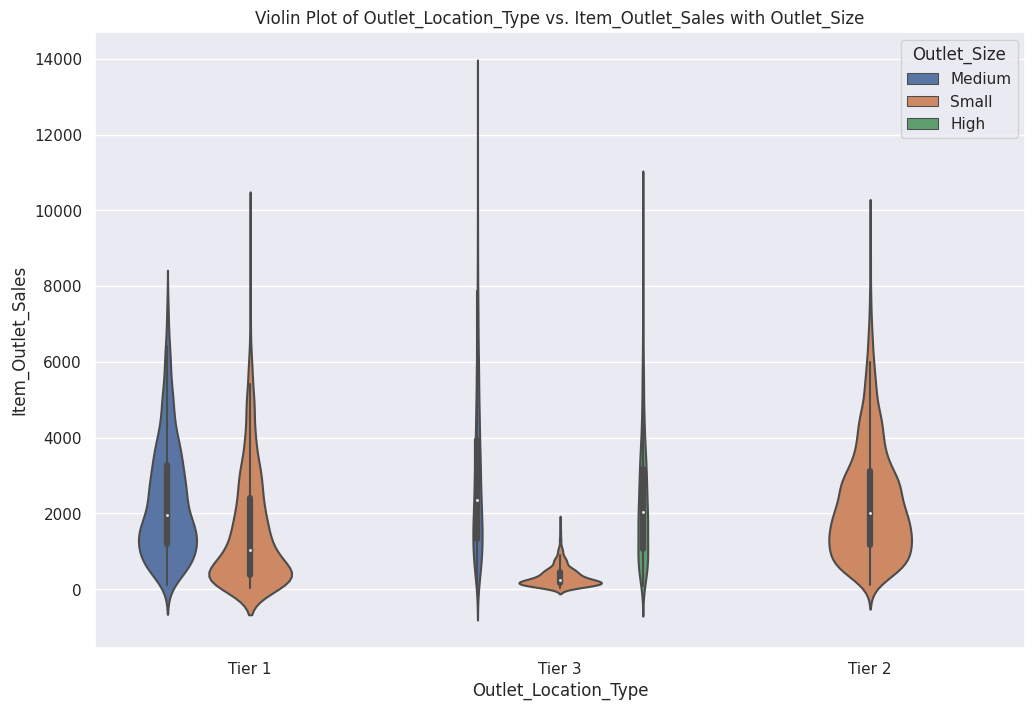

In [54]:
# Violin plot for Outlet_Location_Type vs. Item_Outlet_Sales
plt.figure(figsize=(12, 8))
sns.violinplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=df, hue='Outlet_Size')
plt.title('Violin Plot of Outlet_Location_Type vs. Item_Outlet_Sales with Outlet_Size')
plt.show()

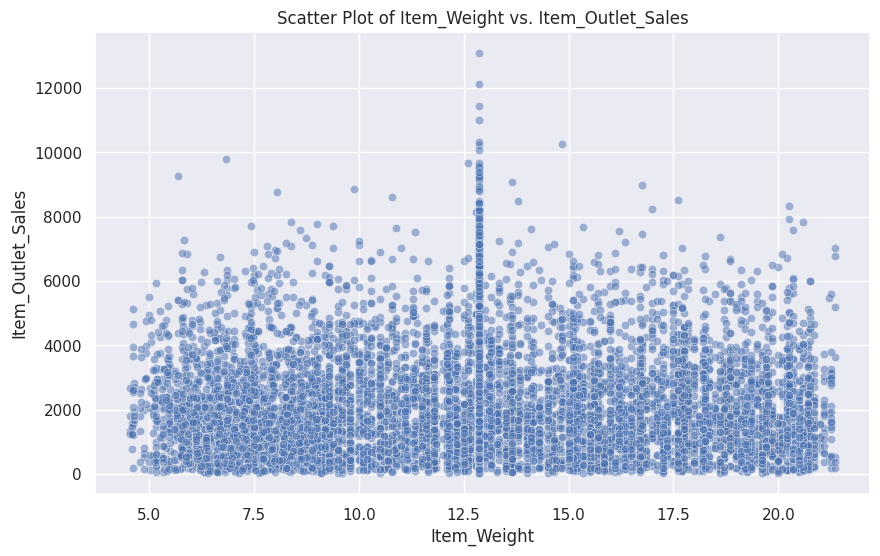

In [55]:
# Scatter plot for Item_Weight vs. Item_Outlet_Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Item_Weight', y='Item_Outlet_Sales', data=df, alpha=0.5)
plt.title('Scatter Plot of Item_Weight vs. Item_Outlet_Sales')
plt.show()

In [56]:
#Combining values which mean the same thing
df.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [57]:
df['Item_Fat_Content']

0       Low Fat
1       Regular
2       Low Fat
3       Regular
4       Low Fat
         ...   
8518    Low Fat
8519    Regular
8520    Low Fat
8521    Regular
8522    Low Fat
Name: Item_Fat_Content, Length: 8523, dtype: object

Label Encoder

In [58]:
encoder = LabelEncoder()

In [59]:
#Using label encoder in order to convert categorical values into a type which can be used in regression models
label_encoder = LabelEncoder()

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

Splitting Data into Target Variable and Other Columns

In [60]:
X = df.drop(columns='Item_Outlet_Sales', axis=1)
Y = df['Item_Outlet_Sales']

Performing Test and Train Split

In [61]:
#Splitting into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [62]:
#Creating a list of models of which we can see the best one
models = [
    ('RandomForest', RandomForestRegressor()),
    ('GradientBoosting', GradientBoostingRegressor()),
    ('XGBoost', XGBRegressor()),
    ('SVR', SVR())
]
print('R squared Value for Training data'+'\n')
for model_name, model in models:
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_train)
    r2 = r2_score(Y_train, y_pred)
    print(f"{model_name}: R-squared score: {r2}")
    print()

R squared Value for Training data

RandomForest: R-squared score: 0.9376551998810996

GradientBoosting: R-squared score: 0.6341142822475091

XGBoost: R-squared score: 0.8767038065269914

SVR: R-squared score: -0.04933182664969493



In [63]:
print('R squared Value for Test data'+'\n')
for model_name, model in models:
      model.fit(X_train, Y_train)
      y_pred = model.predict(X_test)
      metrics =r2_score(Y_test, y_pred)
      print(f"{model_name}: {metrics}")
      print()

R squared Value for Test data

RandomForest: 0.5522036898205398

GradientBoosting: 0.6054922091081143

XGBoost: 0.524872071316624

SVR: -0.02700302445315983



We observe that XGBoost gives lower R sqaured value meaning that the model is more accurate for this dataset and can be used in order to predict Item Sales


XGBoost is a highly effective machine learning algorithm known for its ensemble learning approach. It handles regression and classification tasks, excels with large datasets, and employs a gradient boosting framework to refine models through multiple weak learners like decision trees. Notable for its regularization techniques, handling of missing data, and feature importance insights, XGBoost is widely used in diverse fields due to its efficiency and scalability. Available in multiple programming languages, including Python and R, it has become a popular choice for various machine learning applications.